Aqui não faremos previsões, vamos nos ater aos recursos que a Árvore de decisão tem de diferente e que facilita entender a regra de classificação que ela está usando.

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

In [9]:
df = pd.read_csv("risco_credito.csv")

In [10]:
df.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


In [13]:
X = df.iloc[:,:4].values 
y = df.iloc[:,4].values

In [17]:
label_encoder = LabelEncoder()

In [18]:
#Transformar dados categoricos em dados numericos
X[:,0] = label_encoder.fit_transform(X[:,0])
X[:,1] = label_encoder.fit_transform(X[:,1])
X[:,2] = label_encoder.fit_transform(X[:,2])
X[:,3] = label_encoder.fit_transform(X[:,3])

In [19]:
X #Já está tranformado

array([[3, 0, 1, 0],
       [2, 0, 1, 1],
       [2, 1, 1, 1],
       [2, 1, 1, 2],
       [2, 1, 1, 2],
       [2, 1, 0, 2],
       [3, 1, 1, 0],
       [3, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [1, 0, 1, 2],
       [3, 0, 1, 1]], dtype=object)

In [22]:
arvore_risco_credito = DecisionTreeClassifier(criterion = 'entropy')
arvore_risco_credito.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [23]:
arvore_risco_credito.feature_importances_

array([0.48015651, 0.03885431, 0.03885431, 0.44213486])

In [24]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

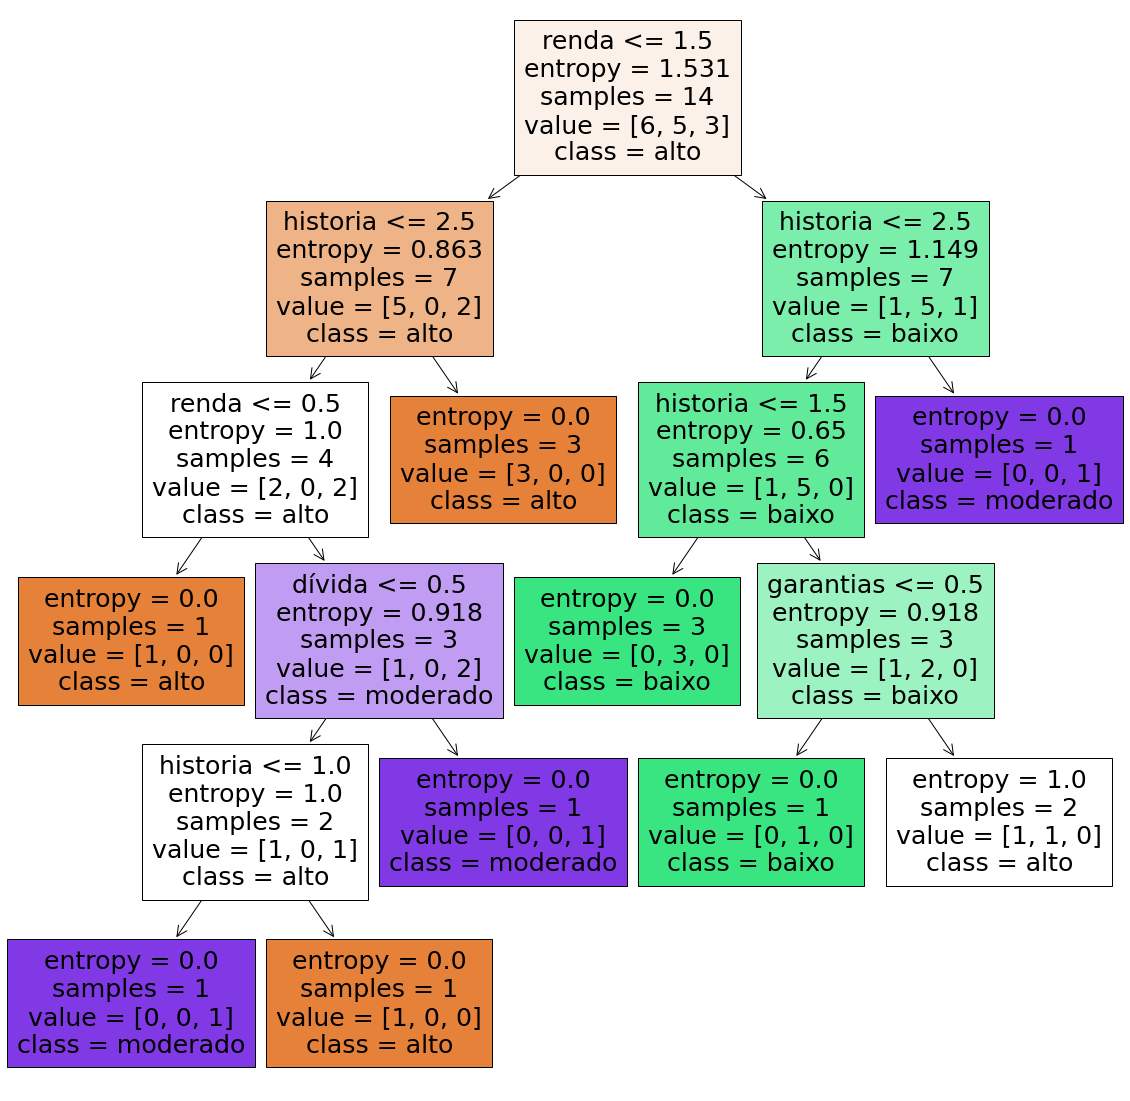

In [27]:
#modelo e descrissão do modelo gerado pela árvore de decisão
previsores = ['historia', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols = 1, figsize=(20,20))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled = True);